### 14장 모델 성능 향상 
* wine 예제

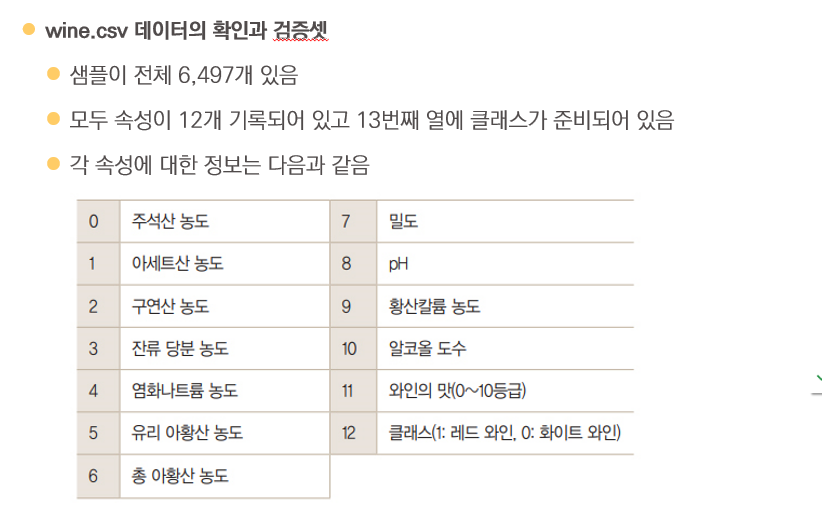

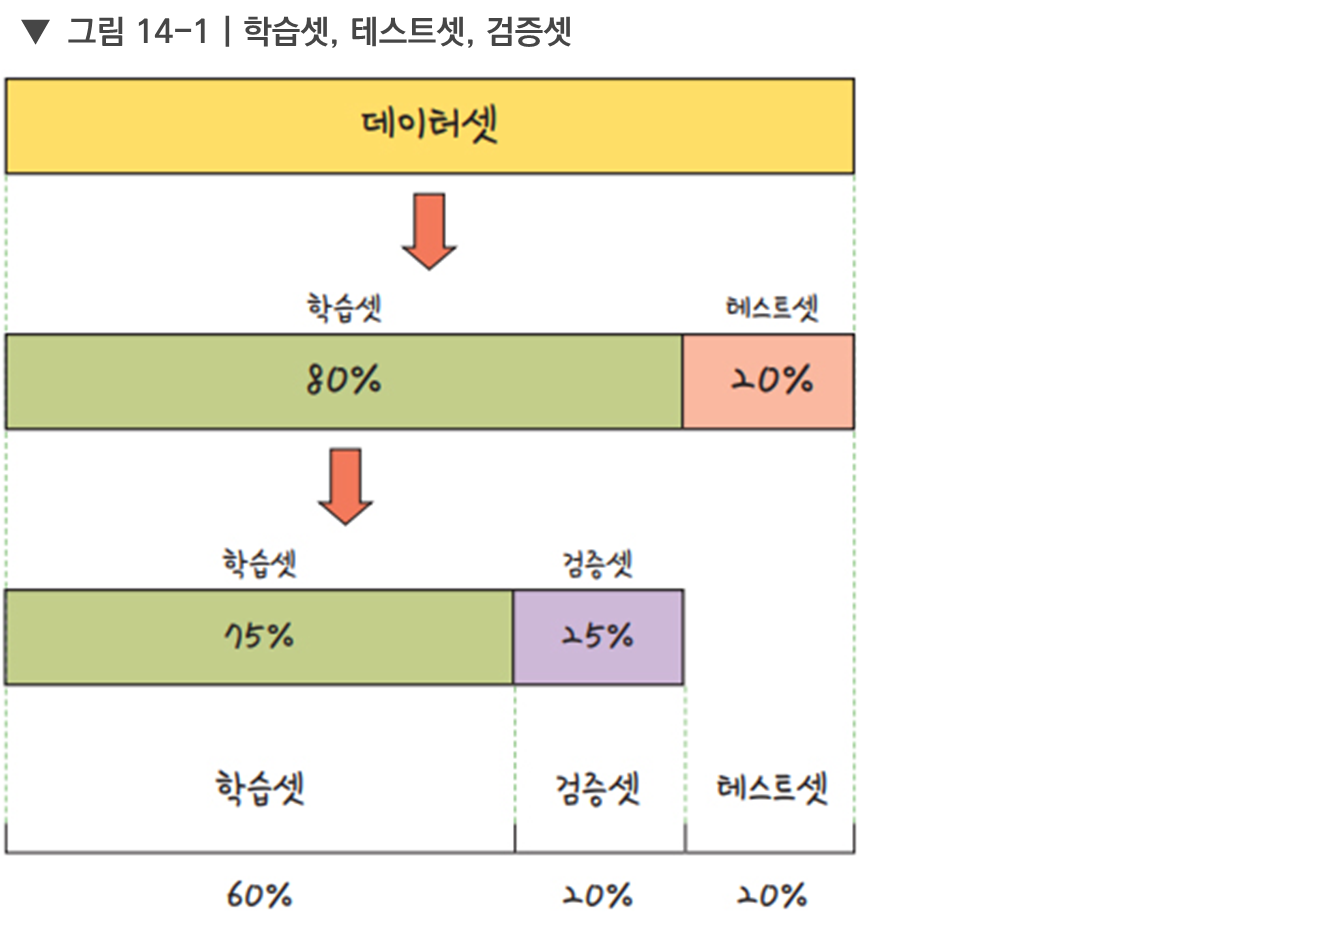

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((6497, 12), (6497,))

In [4]:
# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [5]:
# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
model.summary() 

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.25)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2433 - loss: 13.2422 - val_accuracy: 0.2608 - val_loss: 7.3351
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2435 - loss: 4.3523 - val_accuracy: 0.2746 - val_loss: 1.3505
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6746 - loss: 0.7617 - val_accuracy: 0.9123 - val_loss: 0.5938
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9020 - loss: 0.5908 - val_accuracy: 0.9238 - val_loss: 0.5684
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9243 - loss: 0.5744 - val_accuracy: 0.9262 - val_loss: 0.5559
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9238 - loss: 0.5657 - val_accuracy: 0.9285 - val_loss: 0.5489
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.5593 - val_accuracy: 0.9285 - val_loss: 0.5422
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9320 - loss: 0.5534 - val_accuracy: 0.9346 - val_los

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.3627
Validation loss= 0.3627438247203827
Validation accuracy= 0.9492307901382446


<Axes: >

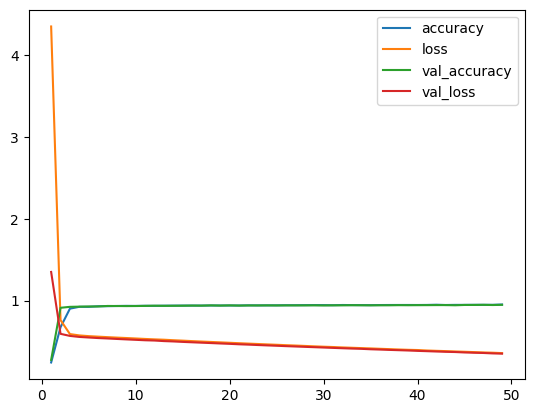

In [7]:
# 테스트 결과 출력 (Test Data Set으로 evaluate)
score = model.evaluate(X_test, y_test)
print('Validation loss=', score[0])
print('Validation accuracy=', score[1])

df_result = pd.DataFrame(history.history)
df_result[1:].plot()

## 모델 업데이트

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 및 실행

In [21]:
## 모델의 저장 조건 설정 (탐색기로 관찰할 것-폴더내 파일 지우고)
## 매 에포크마다 아래의 파일 이름으로 모델이 저장됨
# model_path = '../data/model/wine/{epoch:03d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath="../data/model/wine_model.keras", verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)

In [22]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, 
                    validation_split=0.25,
                    callbacks=[checkpointer])

Epoch 1/2000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9950 - loss: 0.0209
Epoch 1: val_loss improved from None to 0.02253, saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 2/2000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9950 - loss: 0.0180
Epoch 2: val_loss improved from 0.02253 to 0.02089, saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9915 - loss: 0.0325 - val_accuracy: 0.9923 - val_loss: 0.0209
Epoch 3/2000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 3: val_loss did not improve from 0.02089
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9923 - val_loss: 0.0227
Epoch 4/2000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9950 - loss: 0.0149
Epoch 4: val_loss did not improve from 0.02089
20/20 ━━━━━━━━━━━

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [19]:
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.988709,0.039258,0.990000,0.031082
1,0.989479,0.040215,0.991538,0.021904
2,0.987939,0.040206,0.993077,0.020901
3,0.989222,0.039421,0.990769,0.022488
4,0.986656,0.041937,0.993077,0.022832
...,...,...,...,...
195,0.989222,0.036494,0.990000,0.023846
196,0.989222,0.035449,0.986923,0.027584
197,0.988966,0.038185,0.986154,0.044091
198,0.984604,0.047770,0.992308,0.021566


<Axes: >

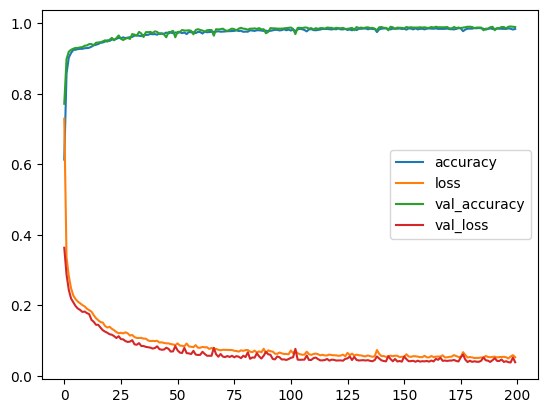

In [12]:
df_history.plot()

<Axes: >

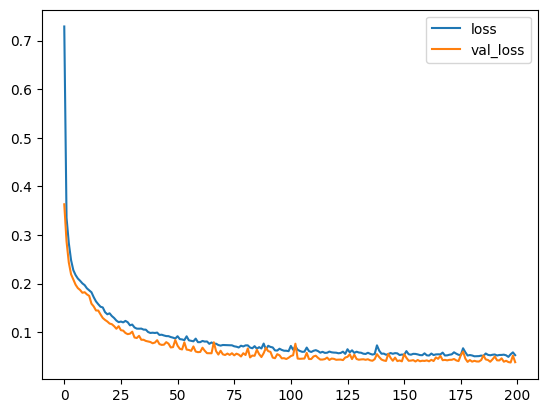

In [13]:
# loss 시각화
import matplotlib.pyplot as plt
df_history[['loss', 'val_loss']].plot()

<Axes: >

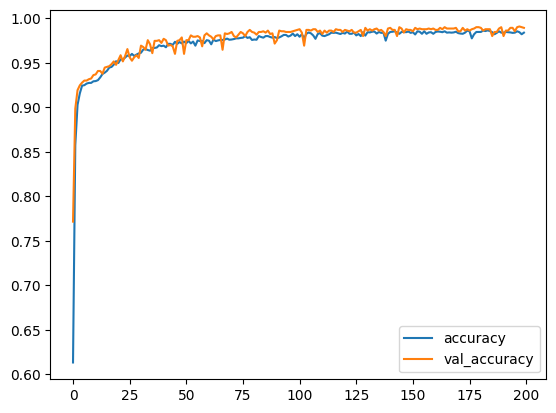

In [14]:
## accuracy 시각화
df_history[['accuracy', 'val_accuracy']].plot()

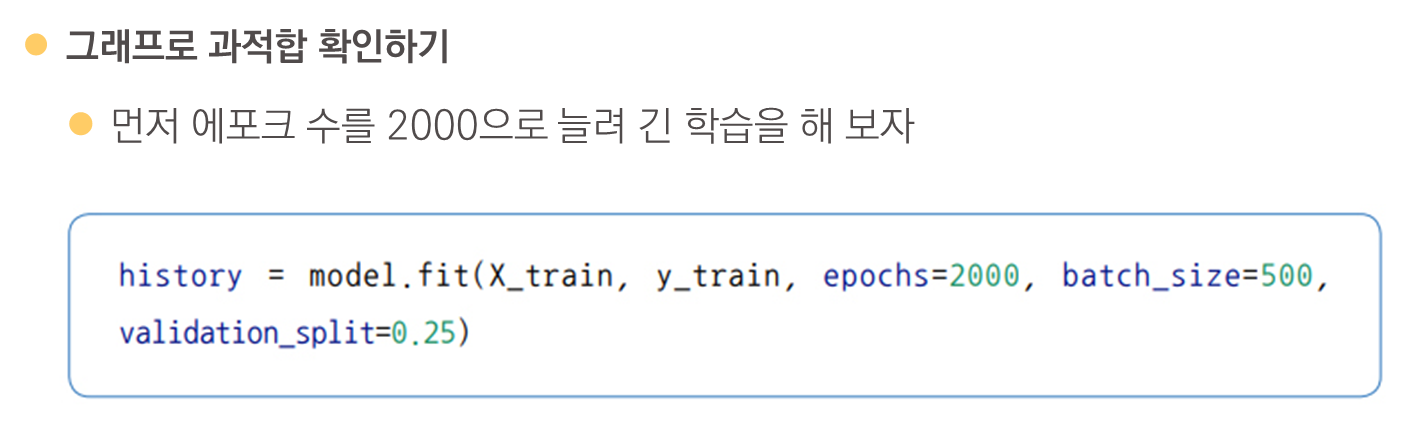

In [15]:
## save_best_only=True로 개선된 모델만 저장
## epochs 2000 -> 시간 오래 걸림 (3분 4초)
## 308번째 epoch에서 val_loss가 최저였음
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
# model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## 모델의 저장 조건 설정
model_path = '../data/model/wine/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1,
                              save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, 
                    validation_split=0.25, verbose=0,
                   callbacks=[checkpointer])

c:\Users\jeong\anaconda3-1\envs\py310_human\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 0.51983, saving model to ../data/model/wine/01-0.8292.keras

Epoch 2: val_loss improved from 0.51983 to 0.28049, saving model to ../data/model/wine/02-0.9008.keras

Epoch 3: val_loss improved from 0.28049 to 0.26199, saving model to ../data/model/wine/03-0.9054.keras

Epoch 4: val_loss improved from 0.26199 to 0.25121, saving model to ../data/model/wine/04-0.9054.keras

Epoch 5: val_loss improved from 0.25121 to 0.24625, saving model to ../data/model/wine/05-0.9077.keras

Epoch 6: val_loss improved from 0.24625 to 0.24287, saving model to ../data/model/wine/06-0.9100.keras

Epoch 7: val_loss improved from 0.24287 to 0.24069, saving model to ../data/model/wine/07-0.9131.keras

Epoch 8: val_loss improved from 0.24069 to 0.23789, saving model to ../data/model/wine/08-0.9138.keras

Epoch 9: val_loss improved from 0.23789 to 0.23552, saving model to ../data/model/wine/09-0.9169.keras

Epoch 10: val_loss improved from 0.23552 to 0.23262, saving model 

In [16]:
## 시각화
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.750577,0.682642,0.829231,0.519829
1,0.873749,0.368042,0.900769,0.280489
2,0.922761,0.238773,0.905385,0.261991
3,0.927893,0.223490,0.905385,0.251211
4,0.928150,0.218280,0.907692,0.246246
...,...,...,...,...
1995,0.988453,0.029521,0.981538,0.087728
1996,0.991789,0.026678,0.981538,0.093321
1997,0.993585,0.021847,0.983846,0.104132
1998,0.991532,0.022592,0.980769,0.098027


<Axes: >

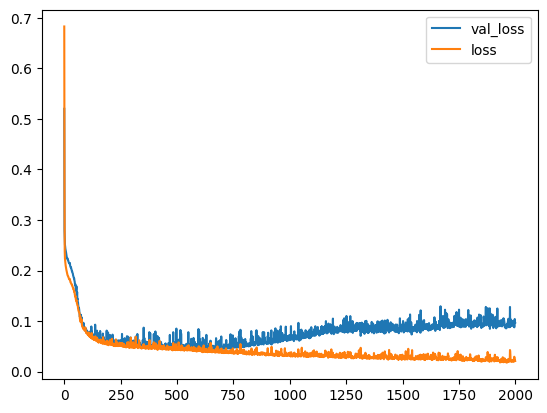

In [17]:
df_history[['val_loss', 'loss']].plot()

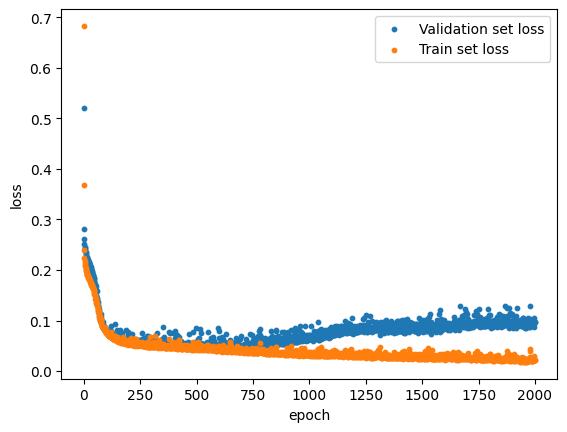

In [18]:
import numpy as np
x_len = np.arange(len(df_history))
plt.scatter(x_len, df_history['val_loss'], s=10, label='Validation set loss')
plt.scatter(x_len, df_history['loss'], s=10, label='Train set loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###  학습 자동 중단 (EarlyStopping)

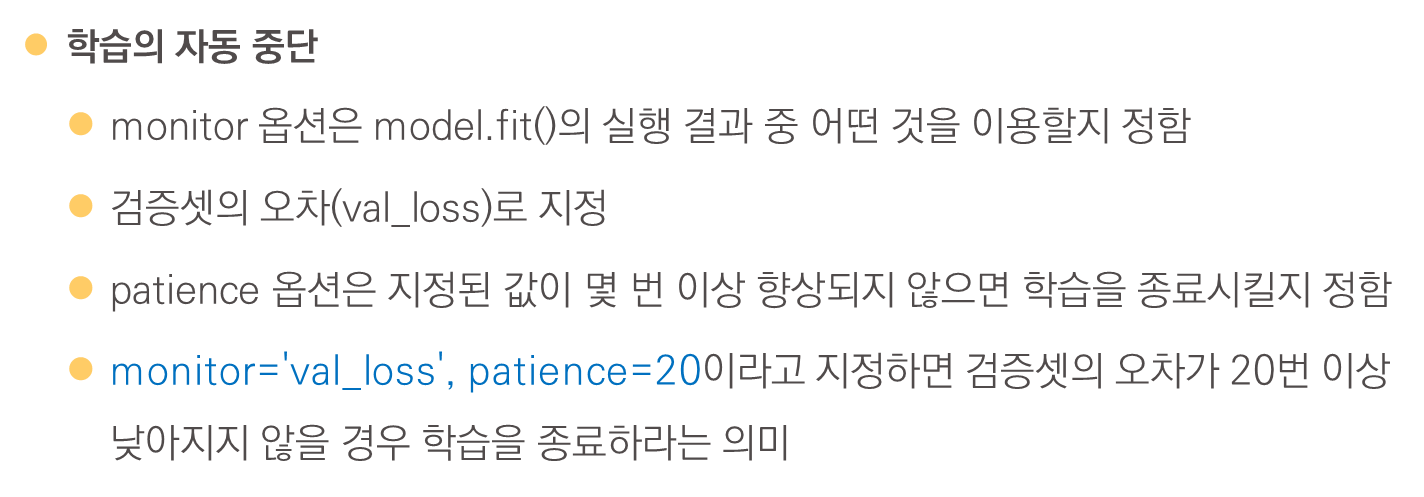

In [19]:
#############################################################
# 파일 자동 저장 : ModelCheckpoint()
# 자동 중단 : EarlyStopping()
#############################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
# model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 자동 중단 callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

## 모델의 저장 조건 설정
# model_path = 'C:/data/model/wine/{epoch:02d}-{val_accuracy:.4f}.hdf5'
## epoch나 정확도 정보를 포함하지 않고, save_best_only=True로 설정하면 최고의 모델 하나만 저장함
model_path = '../data/model/best_model.keras'    # 파일명이 변하지 않도록 -> 최종적으로 bestmodel만 저장
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1,
                               save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, 
                    validation_split=0.25, verbose=0,
                    callbacks=[checkpointer, early_stopping_callback])

c:\Users\jeong\anaconda3-1\envs\py310_human\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 0.60595, saving model to ../data/model/best_model.keras

Epoch 2: val_loss improved from 0.60595 to 0.57996, saving model to ../data/model/best_model.keras

Epoch 3: val_loss improved from 0.57996 to 0.56504, saving model to ../data/model/best_model.keras

Epoch 4: val_loss improved from 0.56504 to 0.55625, saving model to ../data/model/best_model.keras

Epoch 5: val_loss improved from 0.55625 to 0.54898, saving model to ../data/model/best_model.keras

Epoch 6: val_loss improved from 0.54898 to 0.54037, saving model to ../data/model/best_model.keras

Epoch 7: val_loss improved from 0.54037 to 0.53285, saving model to ../data/model/best_model.keras

Epoch 8: val_loss improved from 0.53285 to 0.52712, saving model to ../data/model/best_model.keras

Epoch 9: val_loss improved from 0.52712 to 0.51891, saving model to ../data/model/best_model.keras

Epoch 10: val_loss improved from 0.51891 to 0.51264, saving model to ../data/model/best_model.keras

E

<Axes: >

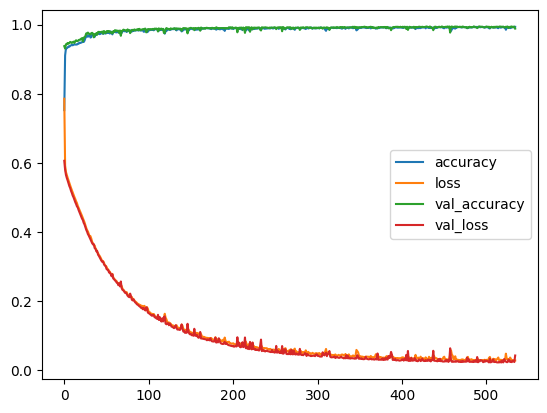

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0618 
Test accuracy: 0.9784615635871887
